<a href="https://colab.research.google.com/github/tanyadixit21/Autoencoders/blob/master/ConvAutoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoders

Autoencoders have various applications in data compression, converting high dimensional data to lower dimensional data, noise removal, generation of images etc.

The second autoencoder architecture is a convolutional autoencoder.

# Convolutional Autoencoders

In [0]:
import sys
import tensorflow as tf
import keras, keras.layers as layers, keras.backend as K
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [0]:
def reset_tf_session():
  K.clear_session()
  tf.reset_default_graph()
  s = K.get_session()
  
  return s

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train_r = x_train.reshape(-1, 28, 28, 1)
x_test_r = x_test.reshape(-1, 28, 28, 1)

In [0]:
def show_img(x):
  plt.imshow(x)

In [12]:
print(x_train[1].shape)


(28, 28)


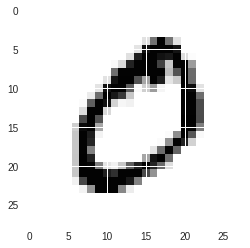

In [13]:
show_img(x_train[1][:])

First let's try to build a simple AUtoencoder architecture using 1D layers. We will try to reduce the number of nodes in the hidden layer so that the network is forced to find out smaller dimension representation of the given data.


In [0]:
img_shape = (28, 28, 1)

In [0]:
def convolutional_autoencoder(img_shape, encoder_size):
  
  H,W,C = img_shape
  
  
  encoder = keras.models.Sequential()
  encoder.add(layers.InputLayer(img_shape))
  encoder.add(layers.Conv2D(filters=28, kernel_size=(3,3), padding="same", activation="elu"))
  encoder.add(layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='same', data_format=None))
    
  encoder.add(layers.Conv2D(filters=56, kernel_size=(3,3), padding="same", activation="elu"))
  encoder.add(layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='same', data_format=None))
    
  encoder.add(layers.Conv2D(filters=112, kernel_size=(3,3), padding="same", activation="elu"))
  encoder.add(layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='same', data_format=None))
    
  encoder.add(layers.Conv2D(filters=196, kernel_size=(3,3), padding="same", activation="elu")) #keeping it 196 so that 28x28 is divisible by it
  encoder.add(layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='same', data_format=None))
    
  encoder.add(layers.Flatten())
  encoder.add(layers.Dense(encoder_size, activation=None, use_bias=True, kernel_initializer='glorot_uniform'))

  
  
  decoder = keras.models.Sequential()
  decoder.add(layers.InputLayer((encoder_size,)))
  decoder.add(layers.Dense((H*W)))
  print(H*W)
  
  dec_shape = int(((H*W)/196)**0.5)
  
  decoder.add(layers.Reshape((dec_shape, dec_shape, 196)))
  
  decoder.add(layers.Conv2DTranspose(filters=112, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
  decoder.add(layers.Conv2DTranspose(filters=56, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
  decoder.add(layers.Conv2DTranspose(filters=28, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
  decoder.add(layers.Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=2, activation=None, padding='same'))
  
  return encoder, decoder
  
  

In [49]:
sess = reset_tf_session()

encoder, decoder = convolutional_autoencoder(img_shape, 28)

784


In [0]:
inp = layers.Input(img_shape) #placeholder creation
code = encoder(inp)
decode = decoder(code)

In [0]:
autoencoder_final = keras.models.Model(inputs=inp, outputs=decode)
autoencoder_final.compile(optimizer='adam', loss='mse')

In [52]:
autoencoder_final.fit(x=x_train_r, y=x_train_r, epochs=15,
                validation_data=[x_test_r, x_test_r],
                verbose=0)

ValueError: ignored

In [0]:
img = x_test[5]

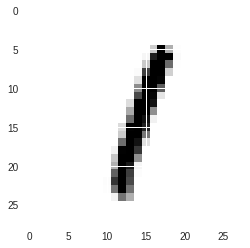

In [0]:
show_img(img)

In [0]:
img.shape

(28, 28)

In [0]:
img[None].shape

(1, 28, 28)

In [0]:
imgx = np.asarray(img[None]).reshape((1,28,28,1))

print(imgx.shape)

(1, 28, 28, 1)


(1, 32)


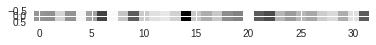

In [0]:
code = encoder.predict(imgx)
print(code.shape)
show_img(code)

In [0]:
dec= decoder.predict(code)
print(dec.shape)

(1, 28, 28, 1)


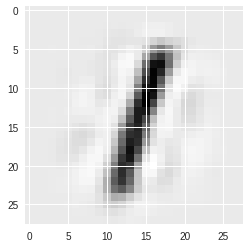

In [0]:
dec_final = np.asarray(dec).reshape((28,28))
show_img(dec_final)